# 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load Data

In [2]:
df = pd.read_csv('data/training_set_features.csv', index_col='respondent_id')
y = pd.read_csv('data/training_set_labels.csv', index_col='respondent_id')
print(df.shape, y.shape)

(26707, 35) (26707, 2)


In [3]:
df.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [4]:
y.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0


In [5]:
df["h1n1_vaccine"] = y["h1n1_vaccine"]
df["seasonal_vaccine"] = y["seasonal_vaccine"]
df[["h1n1_vaccine", "seasonal_vaccine"]].head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0


In [6]:
df.shape

(26707, 37)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26707 entries, 0 to 26706
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker        

In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
h1n1_concern,26615.0,1.618486,0.910311,0.0,1.0,2.0,2.0,3.0
h1n1_knowledge,26591.0,1.262532,0.618149,0.0,1.0,1.0,2.0,2.0
behavioral_antiviral_meds,26636.0,0.048844,0.215545,0.0,0.0,0.0,0.0,1.0
behavioral_avoidance,26499.0,0.725612,0.446214,0.0,0.0,1.0,1.0,1.0
behavioral_face_mask,26688.0,0.068982,0.253429,0.0,0.0,0.0,0.0,1.0
behavioral_wash_hands,26665.0,0.825614,0.379448,0.0,1.0,1.0,1.0,1.0
behavioral_large_gatherings,26620.0,0.358640,0.479610,0.0,0.0,0.0,1.0,1.0
behavioral_outside_home,26625.0,0.337315,0.472802,0.0,0.0,0.0,1.0,1.0
behavioral_touch_face,26579.0,0.677264,0.467531,0.0,0.0,1.0,1.0,1.0
doctor_recc_h1n1,24547.0,0.220312,0.414466,0.0,0.0,0.0,0.0,1.0


# 3. Plotting

### 3.1 Correlation Matrix

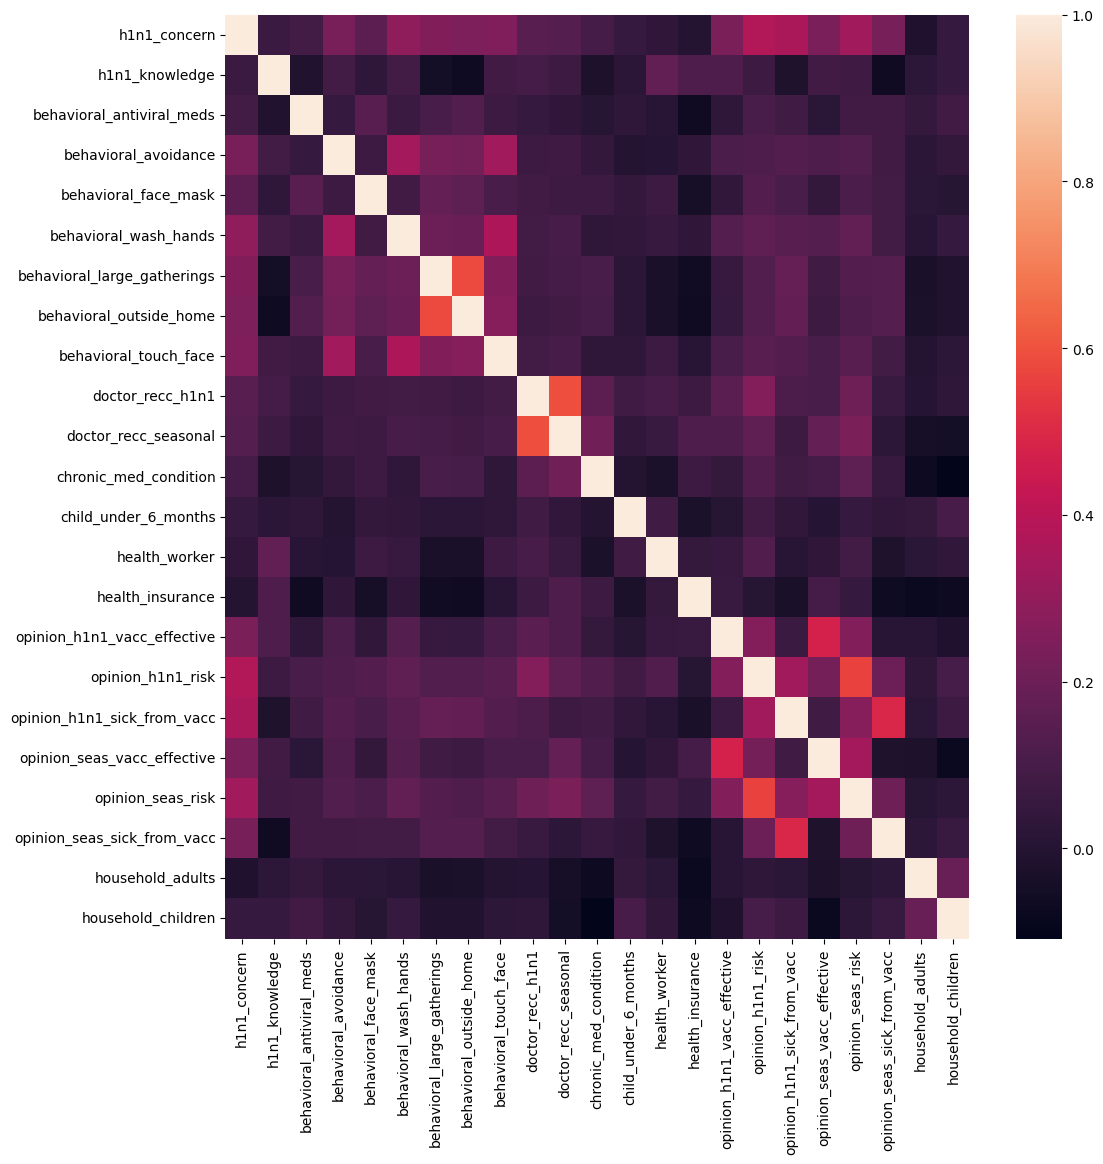

In [36]:
plt.figure(figsize=(12,12))
sns.heatmap(df.drop(["h1n1_vaccine", "seasonal_vaccine"], axis=1).corr(numeric_only=True))
plt.show()

Apparently, there are no big correlations among the numerical features

In [37]:
corr_matrix = df.corr(numeric_only=True)
target_corr = corr_matrix['seasonal_vaccine'].sort_values(ascending=False)
print(target_corr)

seasonal_vaccine               1.000000
opinion_seas_risk              0.390106
h1n1_vaccine                   0.377143
doctor_recc_seasonal           0.369190
opinion_seas_vacc_effective    0.361875
opinion_h1n1_risk              0.216625
opinion_h1n1_vacc_effective    0.205072
health_insurance               0.200858
doctor_recc_h1n1               0.198607
chronic_med_condition          0.170174
h1n1_concern                   0.154828
health_worker                  0.127311
behavioral_touch_face          0.120228
h1n1_knowledge                 0.120152
behavioral_wash_hands          0.112414
behavioral_avoidance           0.076395
behavioral_large_gatherings    0.064025
behavioral_outside_home        0.053509
behavioral_face_mask           0.050083
opinion_h1n1_sick_from_vacc    0.027404
child_under_6_months           0.012097
behavioral_antiviral_meds      0.006277
opinion_seas_sick_from_vacc   -0.061510
household_adults              -0.064840
household_children            -0.114614


In [38]:
corr_matrix = df.corr(numeric_only=True)
target_corr = corr_matrix['h1n1_vaccine'].sort_values(ascending=False)
print(target_corr)

h1n1_vaccine                   1.000000
doctor_recc_h1n1               0.393890
seasonal_vaccine               0.377143
opinion_h1n1_risk              0.323265
opinion_h1n1_vacc_effective    0.269347
opinion_seas_risk              0.258571
doctor_recc_seasonal           0.209864
opinion_seas_vacc_effective    0.179272
health_worker                  0.169768
h1n1_concern                   0.121929
health_insurance               0.121170
h1n1_knowledge                 0.117951
chronic_med_condition          0.095207
opinion_h1n1_sick_from_vacc    0.075091
behavioral_wash_hands          0.074712
behavioral_touch_face          0.071648
behavioral_face_mask           0.070498
child_under_6_months           0.066962
behavioral_avoidance           0.047690
behavioral_antiviral_meds      0.040608
behavioral_outside_home        0.021768
behavioral_large_gatherings    0.017822
opinion_seas_sick_from_vacc    0.008360
household_adults               0.007545
household_children            -0.003320


### 3.2 All features relation with targets

In [39]:
def vaccination_rate_plot(column, vaccine, dataframe, ax=None):
    # We'll now plot a list of features in relation to both types of vaccines (our targets) in bar charts

    counts = (dataframe[[vaccine, column]].groupby([vaccine, column])
                  .size()
                  .unstack(vaccine)
             )
    group_counts = counts.sum(axis="columns")
    props = counts.div(group_counts, axis="index")

    props.plot(kind="barh", stacked=True, ax=ax)
    ax.invert_yaxis()
    ax.legend().remove()

Let's start plotting features that both vaccines may have in comonn:

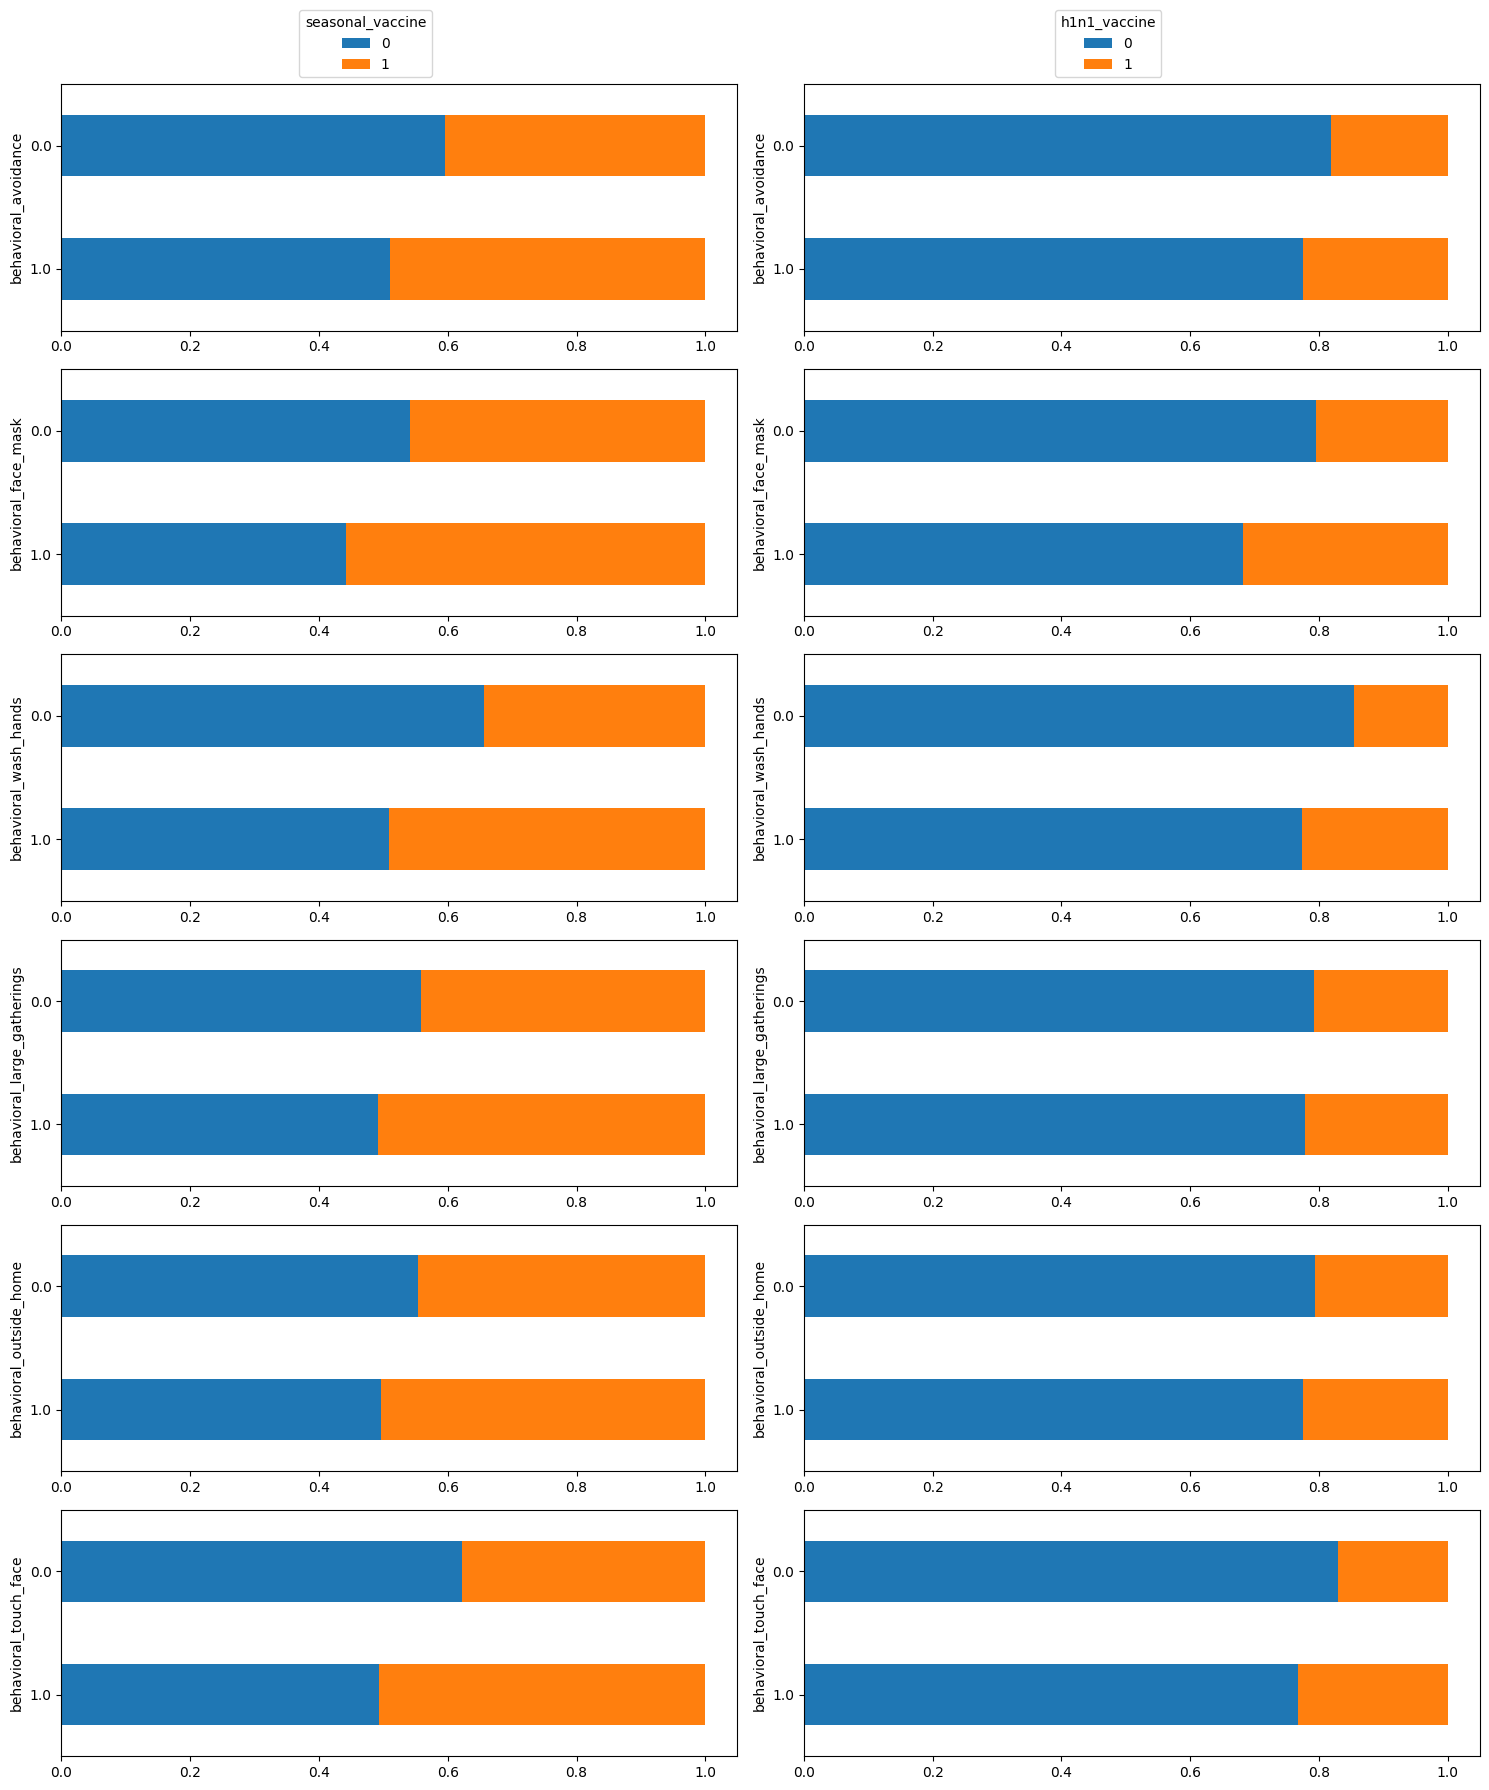

In [40]:
behavior_cols_to_plot = [
    "behavioral_avoidance",
    "behavioral_face_mask",
    "behavioral_wash_hands",
    "behavioral_large_gatherings",
    "behavioral_outside_home",
    "behavioral_touch_face"
    ]

fig, ax = plt.subplots(len(behavior_cols_to_plot), 2, figsize=(15,len(behavior_cols_to_plot)*3))

for idx, col in enumerate(behavior_cols_to_plot):
    vaccination_rate_plot(col, "seasonal_vaccine", df, ax=ax[idx, 0])
    vaccination_rate_plot(col, "h1n1_vaccine", df, ax=ax[idx, 1])
    
ax[0, 0].legend(loc='lower center', bbox_to_anchor=(0.45, 1), title="seasonal_vaccine")
ax[0, 1].legend(loc='lower center', bbox_to_anchor=(0.45, 1), title="h1n1_vaccine")
fig.tight_layout()

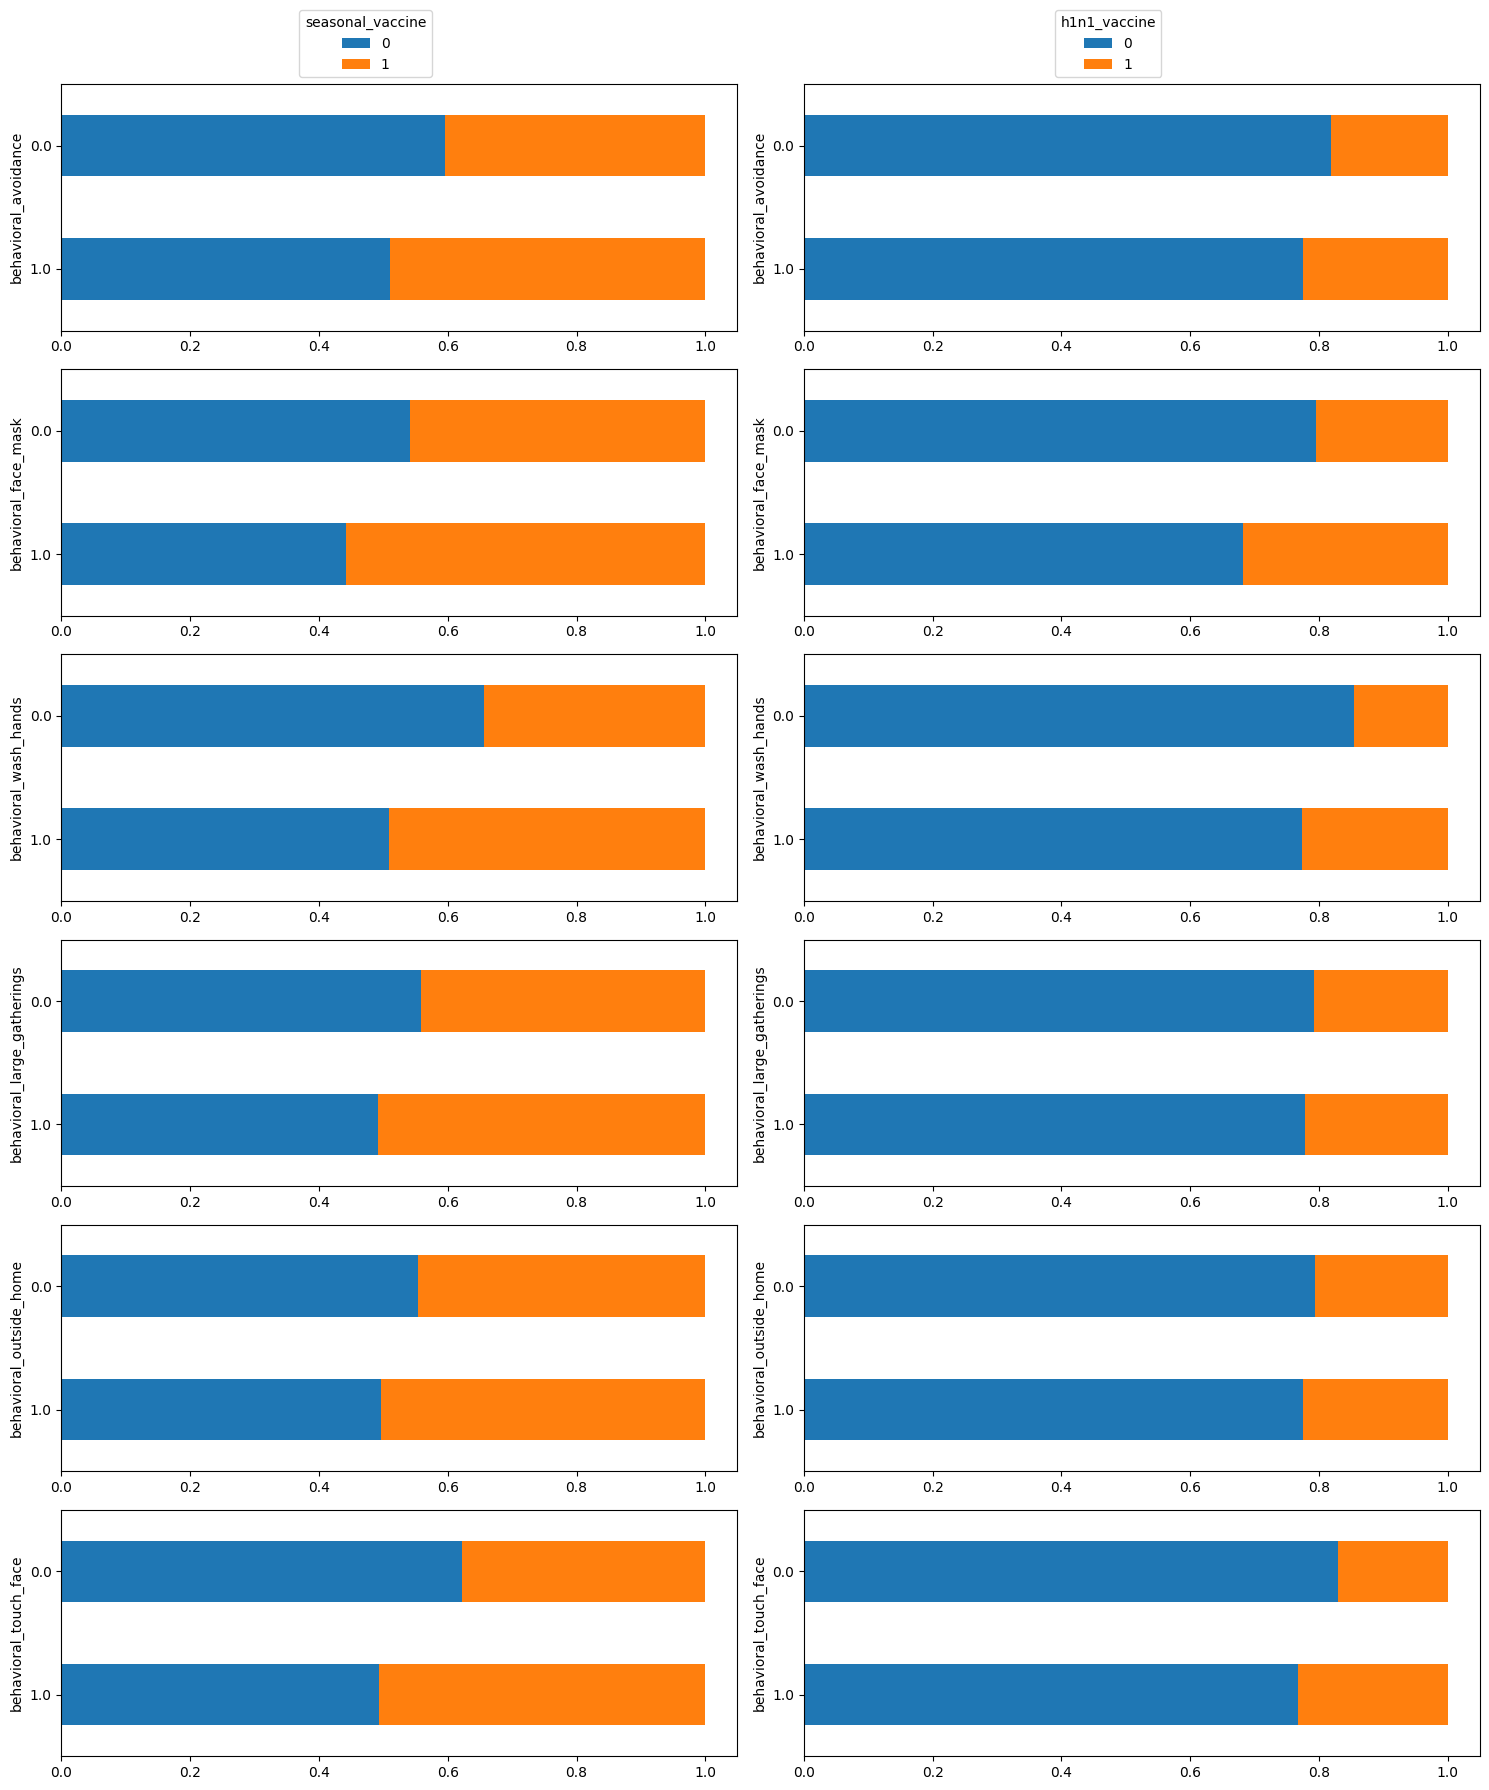

In [41]:
individual_cols_to_plot = [
    "chronic_med_condition",
    "health_worker",
    "health_insurance",
    "age_group",
    "education",
    "race",
    "sex",
    "employment_status",
    ]

fig, ax = plt.subplots(len(behavior_cols_to_plot), 2, figsize=(15,len(behavior_cols_to_plot)*3))

for idx, col in enumerate(behavior_cols_to_plot):
    vaccination_rate_plot(col, "seasonal_vaccine", df, ax=ax[idx, 0])
    vaccination_rate_plot(col, "h1n1_vaccine", df, ax=ax[idx, 1])
    
ax[0, 0].legend(loc='lower center', bbox_to_anchor=(0.45, 1), title="seasonal_vaccine")
ax[0, 1].legend(loc='lower center', bbox_to_anchor=(0.45, 1), title="h1n1_vaccine")
fig.tight_layout()

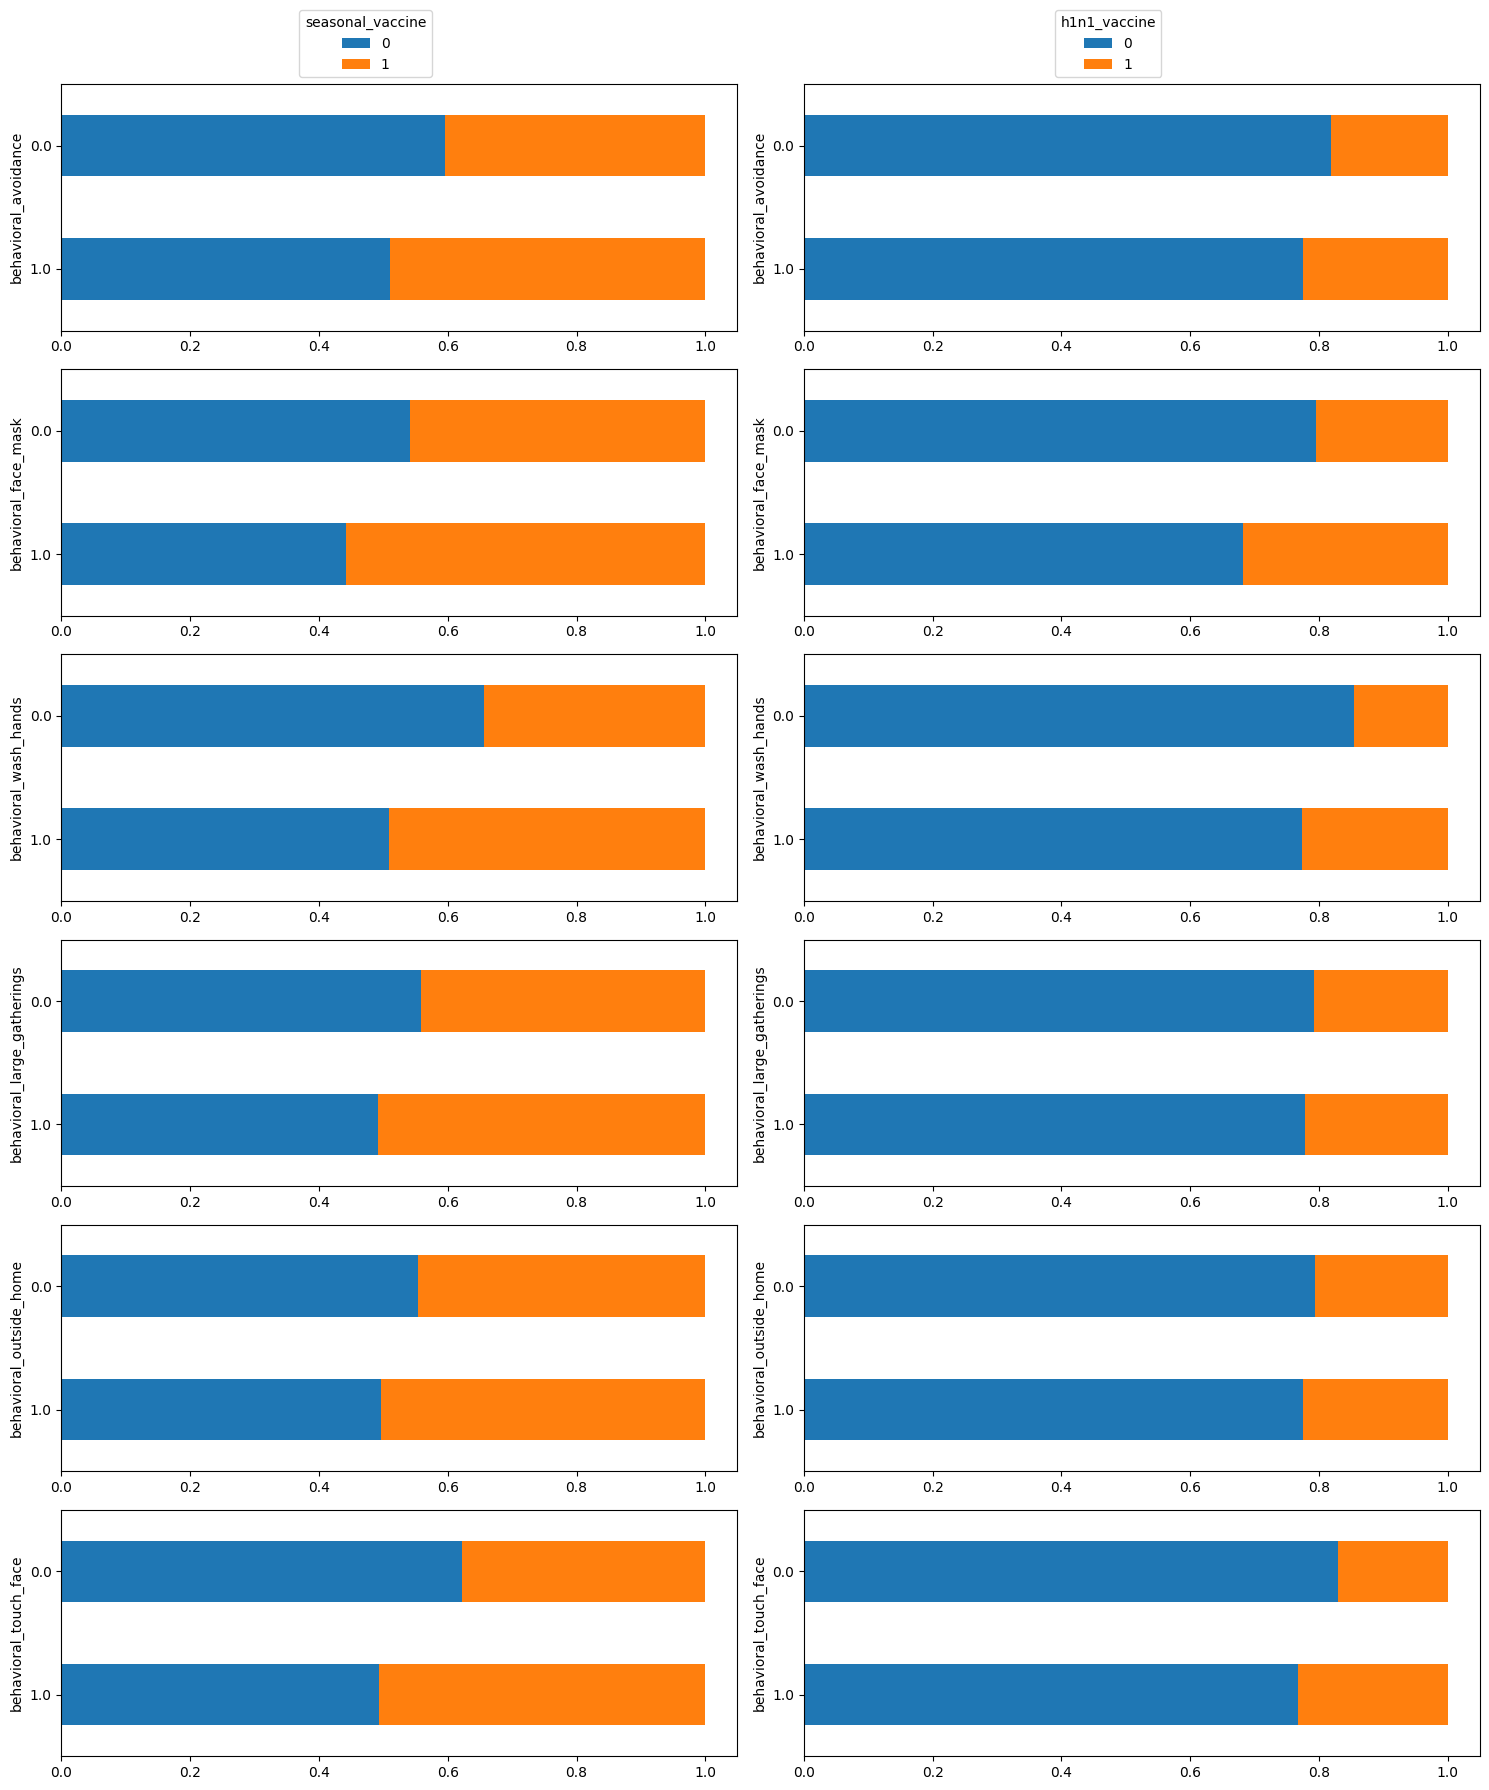

In [42]:
living_cols_to_plot = [
    "child_under_6_months",
    "income_poverty",
    "marital_status",
    "rent_or_own",
    "census_msa",
    'household_adults',
    'household_children'
    ]

fig, ax = plt.subplots(len(behavior_cols_to_plot), 2, figsize=(15,len(behavior_cols_to_plot)*3))

for idx, col in enumerate(behavior_cols_to_plot):
    vaccination_rate_plot(col, "seasonal_vaccine", df, ax=ax[idx, 0])
    vaccination_rate_plot(col, "h1n1_vaccine", df, ax=ax[idx, 1])
    
ax[0, 0].legend(loc='lower center', bbox_to_anchor=(0.45, 1), title="seasonal_vaccine")
ax[0, 1].legend(loc='lower center', bbox_to_anchor=(0.45, 1), title="h1n1_vaccine")
fig.tight_layout()

Now, let's check the ones that are more related to the seasonal vaccine:

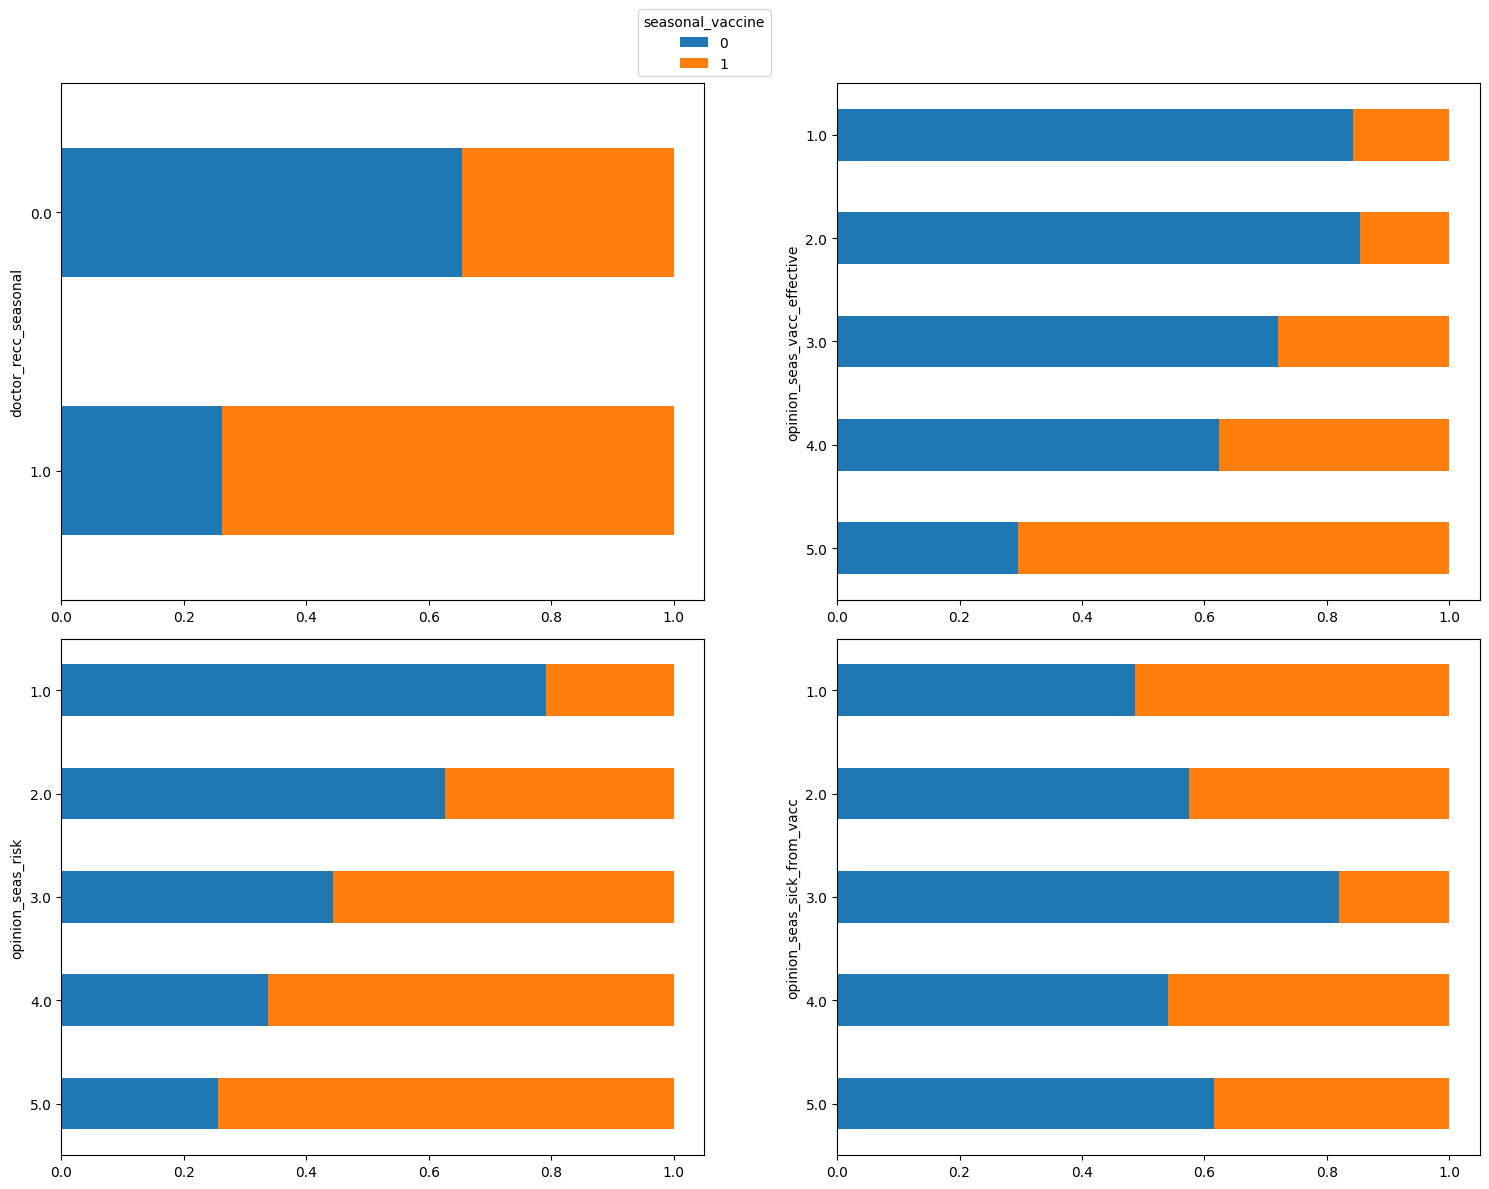

In [43]:
seas_cols_to_plot = [
    "doctor_recc_seasonal",
    "opinion_seas_vacc_effective",
    "opinion_seas_risk",
    "opinion_seas_sick_from_vacc"
    ]

fig, ax = plt.subplots(2, 2, figsize=(15,len(seas_cols_to_plot)*3))

for idx, col in enumerate(seas_cols_to_plot):
    x, y = divmod(idx, 2)
    vaccination_rate_plot(col, "seasonal_vaccine", df, ax=ax[x, y])
    
ax[0, 0].legend(loc='lower center', bbox_to_anchor=(1, 1), title="seasonal_vaccine")
fig.tight_layout()

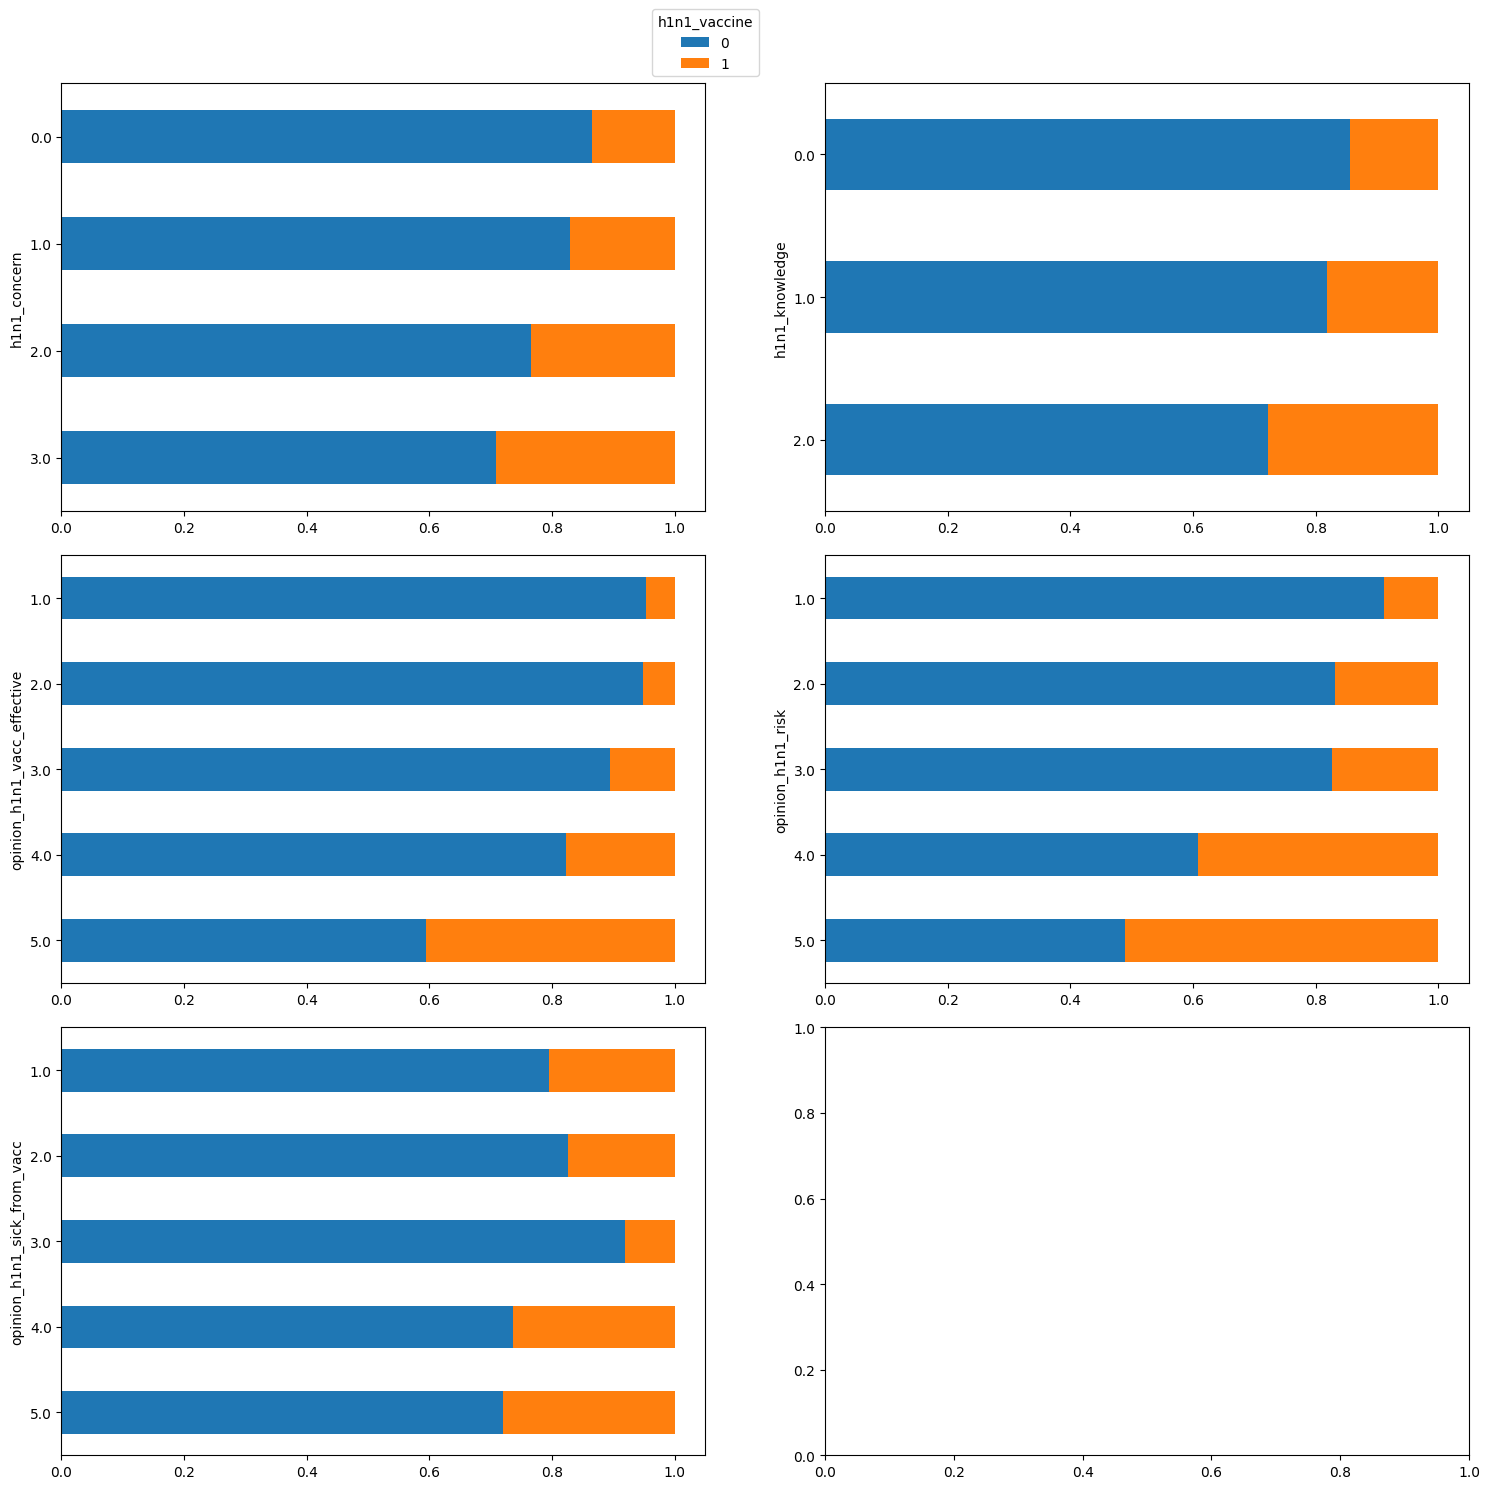

In [44]:
h1n1_cols_to_plot = [
    'h1n1_concern',
    'h1n1_knowledge',
    'opinion_h1n1_vacc_effective',
    'opinion_h1n1_risk',
    'opinion_h1n1_sick_from_vacc'
]

fig, ax = plt.subplots(3, 2, figsize=(15,len(h1n1_cols_to_plot)*3))

for idx, col in enumerate(h1n1_cols_to_plot):
    x, y = divmod(idx, 2)
    vaccination_rate_plot(col, "h1n1_vaccine", df, ax=ax[x, y])
    
ax[0, 0].legend(loc='lower center', bbox_to_anchor=(1, 1), title="h1n1_vaccine")
fig.tight_layout()
fig.tight_layout()

# 4.NaN's

In [45]:
# NaN values
nan_ser = df.isna().sum().sort_values(ascending=False)
nan_ser[nan_ser > 0]

employment_occupation          13470
employment_industry            13330
health_insurance               12274
income_poverty                  4423
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
rent_or_own                     2042
employment_status               1463
marital_status                  1408
education                       1407
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
opinion_seas_sick_from_vacc      537
opinion_seas_risk                514
opinion_seas_vacc_effective      462
opinion_h1n1_sick_from_vacc      395
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
household_adults                 249
household_children               249
behavioral_avoidance             208
behavioral_touch_face            128
h1n1_knowledge                   116
h1n1_concern                      92
behavioral_large_gatherings       87
behavioral_outside_home           82
b

Almost 50% of the employment information is missing! That's a huge deal unless this feature is not really relevant.

In [46]:
df["health_insurance"].value_counts()

health_insurance
1.0    12697
0.0     1736
Name: count, dtype: int64

Only a 12% of the subjects that has provided the `Health insurance` information doesn't have health insurance.
But, because there are a huge amaount of rows without this information, I will impute "-1" vale as a "Missing information" for this sort of features.

Let's start defining categorical features (that will be represented as "Missing" the `NaN` values):

In [47]:
multiple_categorical = [
    "employment_occupation", 
    "employment_industry",
    "employment_status"
    ]

# Now we just replace the NaN's with "Missing"
for col in multiple_categorical:
    df[col] = df[col].fillna(value="Missing")

In order to not acumulate too many columns, we can handle categorical features with an opposite meaning among the options. We'll name them "single categorical". Later, we could handle them as they were ordinal with only three opcions ("YES" = 1, "NO" = 0, "Missing" = -1)

In [48]:
single_categorical =[
    "rent_or_own",
    "marital_status"
]

def convert_own(dataframe):
    if dataframe["rent_or_own"] == "Own":
        return 1
    elif dataframe["rent_or_own"] == "Rent":
        return 0
    return -1

df["own_home"] = df.apply(convert_own, axis=1)


def convert_marr(dataframe):
    if dataframe["marital_status"] == "Married":
        return 1
    elif dataframe["marital_status"] == "Not Married":
        return 0
    return -1

df["married"] = df.apply(convert_marr, axis=1)

# Removing old features:
for col in single_categorical:
    df.drop(col, axis=1, inplace=True)

Now we'll aproach numerical features with missing values. We'll start dealing with the ordinal ones:

In [49]:
ordinal_non_num = [
    "income_poverty",
    "education",
    ]

And finally, all the other numerical features with `NaN's`

In [50]:
numerical = [
    "health_insurance",
    "doctor_recc_h1n1",
    "doctor_recc_seasonal",
    "chronic_med_condition",
    "child_under_6_months",
    "health_worker",
    "opinion_seas_sick_from_vacc",
    "opinion_seas_risk",
    "opinion_seas_vacc_effective",
    "opinion_h1n1_sick_from_vacc",
    "opinion_h1n1_vacc_effective",
    "opinion_h1n1_risk",
    "household_adults",
    "household_children",
    "behavioral_avoidance",
    "behavioral_touch_face",
    "h1n1_knowledge",
    "h1n1_concern",
    "behavioral_large_gatherings",
    "behavioral_outside_home",
    "behavioral_antiviral_meds",
    "behavioral_wash_hands",
    "behavioral_face_mask"
    ]

for col in numerical:
    df[col] = df[col].fillna(value=-1)

### Ordinal Encoding

In [51]:
def convert_income(dataframe):
    if dataframe["income_poverty"] == "> $75,000":
        return 2
    elif dataframe["income_poverty"] == "<= $75,000, Above Poverty":
        return 1
    elif dataframe["income_poverty"] == "Below Poverty":
        return 0
    return -1

df["income_lvl"] = df.apply(convert_income, axis=1)


def convert_edu(dataframe):
    if dataframe["education"] == "College Graduate":
        return 3
    elif dataframe["education"] == "Some College":
        return 2
    elif dataframe["education"] == "12 Years":
        return 1
    elif dataframe["education"] == "< 12 Years":
        return 0
    return -1

df["edu_lvl"] = df.apply(convert_edu, axis=1)

# Removing old features:
for col in ordinal_non_num:
    df.drop(col, axis=1, inplace=True)

### One Hot Encoding

In [52]:
fts_to_onehot = df.select_dtypes(exclude='number').columns

In [53]:
# Number of unique elements, to make sure we don't create too many columns
for ft in fts_to_onehot:
    print(ft, df[ft].nunique())

age_group 5
race 4
sex 2
employment_status 4
hhs_geo_region 10
census_msa 3
employment_industry 22
employment_occupation 24


In [54]:
df = pd.get_dummies(df, columns=fts_to_onehot, drop_first=True, dtype=int)
df.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,employment_occupation_qxajmpny,employment_occupation_rcertsgn,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0,0,0,0,0,0,1,0,0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,...,0,0,0,0,0,0,0,0,1,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0


# Verifying if the dataset is balanced:
### H1N1

<Axes: xlabel='h1n1_vaccine', ylabel='count'>

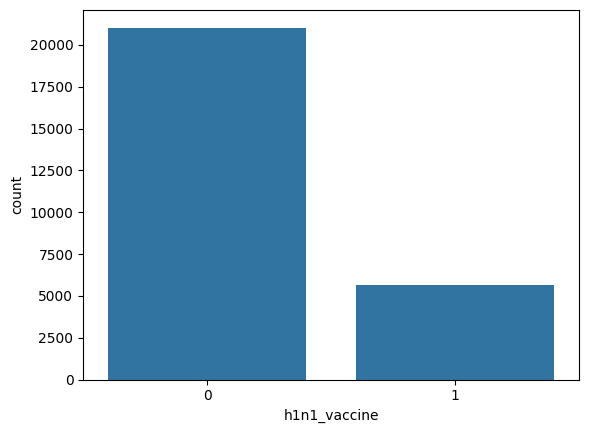

In [55]:
sns.countplot(x=df["h1n1_vaccine"], data=df)

Unfortunatelly, H1N1 Vaccine is not balanced. We'll have to deal with this imbalance later.
### Seasonal Flu

<Axes: xlabel='seasonal_vaccine', ylabel='count'>

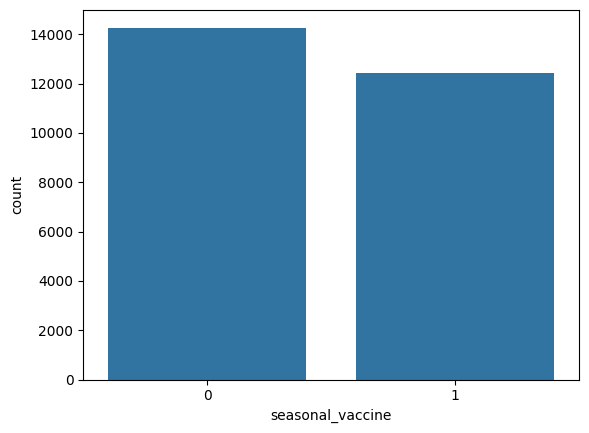

In [56]:
sns.countplot(x=df["seasonal_vaccine"], data=df)

Fortunately, "Seasonal vaccine" is more balanced.

## Correlations

In [57]:
# Get correlations between features without duplicates
corrs = df.corr().unstack().reset_index().drop_duplicates()
# Remove correlations between the same feature
corrs = corrs[corrs['level_0'] != corrs['level_1']]
# Get high correlations
corrs[(corrs[0] > 0.95) | (corrs[0] < -0.95)]

,level_0,level_1,0
5395,employment_industry_haxffmxo,employment_occupation_dcjcmpih,1.0
7181,employment_occupation_dcjcmpih,employment_industry_haxffmxo,1.0


We can drop one of those features, as they are both bringing the same information (correlation = 1)

In [58]:
df.drop("employment_occupation_dcjcmpih", axis=1, inplace=True)

### Saving the DataFrame

In [59]:
# Make sure there are no NaN values
assert df.isna().sum().sum() == 0

In [60]:
# Make sure all columns are numeric
assert df.select_dtypes(include='number').shape[1] == df.shape[1]

In [61]:
df.shape

(26707, 94)

In [62]:
# Saving the DF.
df.to_csv('data/vaccines_features.csv', index=False)